# TASK

# =================

## In this notebook, find procedures related to unsupervised machine learning on the Atlantic basin Storms Project, including:
### -Elbow technique
### -k-means algorithm
### -Cluster visualizations
### -Findings and reflections

# =================

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_states.csv'))

In [5]:
# Check output

df.shape

(885, 17)

In [6]:
df.head()

,Unnamed: 0,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,geom,address_full,state
0,0,Belle,1976,8,10,6,41.0,-73.2,tropical storm,0,60,983,0,0,"41.0,-73.2","Town of Smithtown, Suffolk County, New York, U...",Pennsylvania
1,1,Belle,1976,8,10,12,42.6,-72.4,tropical storm,0,35,992,0,0,"42.6,-72.4","2, Hanson Court, Erving, Franklin County, Mass...",South Carolina
2,2,Clara,1977,9,5,12,32.8,-80.0,tropical depression,-1,20,1015,0,0,"32.8,-80.0","Fuseler Road, Murry Hill, Charleston, Charlest...",South Carolina
3,3,Clara,1977,9,5,18,33.2,-79.0,tropical depression,-1,20,1014,0,0,"33.2,-79.0",United States,South Carolina
4,4,Amelia,1978,7,31,18,28.6,-98.7,tropical depression,-1,30,1010,0,0,"28.6,-98.7","McMullen County, Texas, United States",South Carolina


In [7]:
# remove unwanted column

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,geom,address_full,state
0,Belle,1976,8,10,6,41.0,-73.2,tropical storm,0,60,983,0,0,"41.0,-73.2","Town of Smithtown, Suffolk County, New York, U...",Pennsylvania
1,Belle,1976,8,10,12,42.6,-72.4,tropical storm,0,35,992,0,0,"42.6,-72.4","2, Hanson Court, Erving, Franklin County, Mass...",South Carolina
2,Clara,1977,9,5,12,32.8,-80.0,tropical depression,-1,20,1015,0,0,"32.8,-80.0","Fuseler Road, Murry Hill, Charleston, Charlest...",South Carolina
3,Clara,1977,9,5,18,33.2,-79.0,tropical depression,-1,20,1014,0,0,"33.2,-79.0",United States,South Carolina
4,Amelia,1978,7,31,18,28.6,-98.7,tropical depression,-1,30,1010,0,0,"28.6,-98.7","McMullen County, Texas, United States",South Carolina


## Conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). (Step 2)

In [9]:
# Check data types for any categorical data

df.dtypes

name                               object
year                                int64
month                               int64
day                                 int64
hour                                int64
latitude                          float64
longitude                         float64
status                             object
category                            int64
wind_knots                          int64
pressure_hpa                        int64
trop_storm_force_wind_diameter      int64
hurricane_force_wind_diameter       int64
geom                               object
address_full                       object
state                              object
dtype: object

In [10]:
# Remove any categorical variables

kdf = df.drop(columns = ['name', 'year', 'month', 'day', 'hour', 'status', 'category', 'geom', 'address_full', 'state'])

In [11]:
kdf.columns

Index(['latitude', 'longitude', 'wind_knots', 'pressure_hpa',
       'trop_storm_force_wind_diameter', 'hurricane_force_wind_diameter'],
      dtype='object')

In [12]:
# Check stats to determine if standardization is necessary for scale

kdf.describe()

,latitude,longitude,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
count,885.000000,885.000000,885.000000,885.000000,885.00000,885.000000
mean,32.458079,-87.024633,39.265537,996.671186,36.80226,2.943503
std,3.157809,6.913944,21.518239,15.659388,76.33577,14.134422
min,28.100000,-104.300000,10.000000,919.000000,0.00000,0.000000
25%,30.000000,-92.600000,25.000000,991.000000,0.00000,0.000000
50%,31.700000,-87.100000,30.000000,1001.000000,0.00000,0.000000
75%,34.200000,-81.700000,50.000000,1007.000000,0.00000,0.000000
max,44.100000,-69.100000,140.000000,1022.000000,350.00000,165.000000


## Use the elbow technique as shown in the Jupyter notebook for this Exercise. (Step 3)

In [13]:
# Define cluster range

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Create score for variation range

score = [kmeans[i].fit(kdf).score(kdf) for i in range(len(kmeans))] 

score

[-6004974.042485877,
 -1527107.6513841674,
 -981356.0639226518,
 -700789.0046048635,
 -520506.2701408892,
 -436500.7813974684,
 -374542.3033091517,
 -322649.5391207634,
 -285088.49900604854]

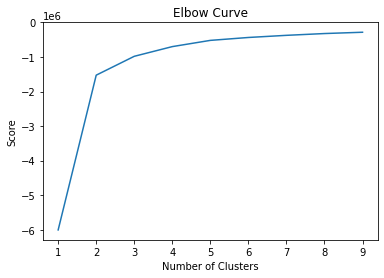

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number in a markdown cell. (Step 4)

##### I'm going to use only 2 clusters for my k-means algorithm because the elbow curve in the plot above occurs after 2 clusters. The line sharply bends at the value of 2, while only slightly tapering from that point onward, suggesting that examining more than 2 clusters does not reveal any additional insight into variable relationships.

## Run the k-means algorithm. (Step 5)

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) # I chose 2 clusters to examine

In [17]:
# Fit the k-means object to the data.

kmeans.fit(kdf)

KMeans(n_clusters=2)

## Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters. (Step 6)

In [18]:
kdf['clusters'] = kmeans.fit_predict(kdf)

In [19]:
kdf.head()

,latitude,longitude,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,clusters
0,41.0,-73.2,60,983,0,0,0
1,42.6,-72.4,35,992,0,0,0
2,32.8,-80.0,20,1015,0,0,0
3,33.2,-79.0,20,1014,0,0,0
4,28.6,-98.7,30,1010,0,0,0


In [20]:
# Check value counts

kdf['clusters'].value_counts()

0    718
1    167
Name: clusters, dtype: int64

In [21]:
# Export dataset with clusters

kdf.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_clusters.csv'))

## Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters. (Step 7)

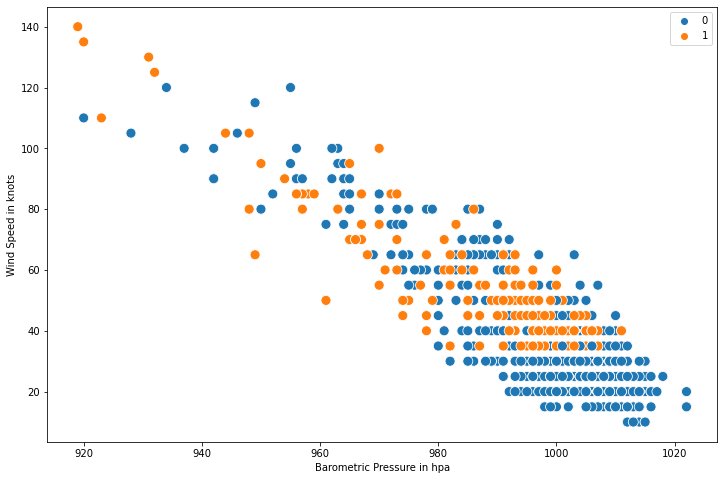

In [21]:
# Examine relationship of 'pressure_hpa' and 'wind_knots'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kdf['pressure_hpa'], y=kdf['wind_knots'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Barometric Pressure in hpa') # Label x-axis.
plt.ylabel('Wind Speed in knots') # Label y-axis.
plt.show()

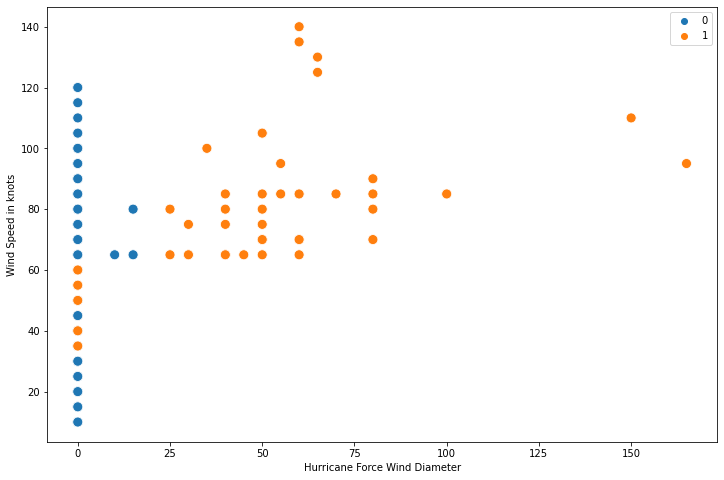

In [22]:
# Examine relationship of 'hurricane_force_wind_diameter' and 'wind_knots'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kdf['hurricane_force_wind_diameter'], y=kdf['wind_knots'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Hurricane Force Wind Diameter') # Label x-axis.
plt.ylabel('Wind Speed in knots') # Label y-axis.
plt.show()

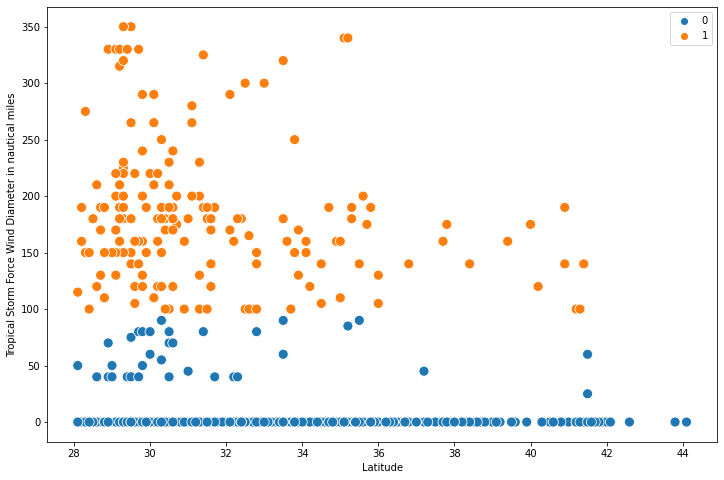

In [23]:
# Examine relationship of 'latitude' and 'trop_storm_force_wind_diameter'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kdf['latitude'], y=kdf['trop_storm_force_wind_diameter'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Latitude') # Label x-axis.
plt.ylabel('Tropical Storm Force Wind Diameter in nautical miles') # Label y-axis.
plt.show()

## Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. (Step 8)

### A. Pressure and Wind Speed
##### These clusters seem to make sense, in that barometric pressure and wind speed can be related within a storm's composition, but together do not imply the value of one will always lead to the value of another. Put another way, lower pressure allows storms to accumulate and therefore we could see increased wind speeds, but the absence of clear centroid clustering suggests these two variables might be more related through linear regression.

### B. Hurricane Force Wind Diameter and Wind Speed
##### These clusters appear to be impacted by the high frequency of zero values for wind diameter. A more accurate examination will need to be performed with a new variable combining force wind diameters for both tropical storms and hurricanes, since each storm can only ever be classified as one or the other at any given observation and not both at the same time. This should eliminate many of the zero values, and any storm containing a zero in both columns can be filtered out for analysis.

### C. Latitude and Tropical Storm Force Wind Diameter
##### Again the prevalence of zero values seems to be skewing the clusters. I'm trying to examine whether a storm's latitudinal location impacts a storm's size, but this plot seems to be showing more of a regression than centroid clustering.

## Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings. (Step 9)

In [24]:
kdf.loc[kdf['clusters'] == 1, 'cluster'] = 'orange'
kdf.loc[kdf['clusters'] == 0, 'cluster'] = 'blue'

In [26]:
kdf.head()

,latitude,longitude,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,clusters,cluster
0,41.0,-73.2,60,983,0,0,0,blue
1,42.6,-72.4,35,992,0,0,0,blue
2,32.8,-80.0,20,1015,0,0,0,blue
3,33.2,-79.0,20,1014,0,0,0,blue
4,28.6,-98.7,30,1010,0,0,0,blue


In [27]:
kdf.groupby('cluster').agg({'wind_knots': ['mean', 'median'],
                           'pressure_hpa': ['mean', 'median'],
                           'trop_storm_force_wind_diameter':['mean', 'median'],
                           'hurricane_force_wind_diameter':['mean', 'median']})

wind_knots        pressure_hpa         trop_storm_force_wind_diameter  \
              mean median         mean  median                           mean   
cluster                                                                         
blue     35.459610   30.0   999.168524  1003.0                       2.924791   
orange   55.628743   50.0   985.934132   992.0                     182.455090   

               hurricane_force_wind_diameter         
        median                          mean median  
cluster                                              
blue       0.0                      0.055710    0.0  
orange   175.0                     15.359281    0.0

##### As above in the plots, the cluster with slower mean and median wind speeds does not show much of a difference overall in pressure compared to the cluster with higher wind speeds. The presence of median values of '0' for both force wind diameter variables further betrays the evidence of skewed data that need to be resolved, as the middle value of size observations for storms should never be zero unless that measurement was never taken for many more storms than not.

## Propose what these results could be useful for in future steps of an analytics pipeline. (Step 10)

##### As they exist now, these clusters could lend further support to an analysis by means of opposition. If after the data are further cleaned to account for force wind diameters these clusters show little to no relationships, then they could be used to enhance a defense that certain variables are more regressively related instead. These clusters could also help to explain the basic meterology of storm formation itself, as a foundation when telling the story of the analysis. If the audience understands these relationships first, then showing findings of whether or not storms are increasing in frequency or intensity (for example) could lead to a more effective impact in presentation. 